In [289]:
# librerías
import numpy as np
np.random.seed(2024)
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from itertools import product
# guardado de gráficos
def save_plot(title='plot', path='./informe/img/'):
  plt.savefig(f'{path}{title}.png', dpi=300, bbox_inches='tight')

$\underline{\text{TP2 - Ejercicio 8}}$  
Entrenar un perceptrón multicapa que resuelva una $\text{XOR}$ de $2$ entradas mediante simulated annealing. Graficar el error a lo largo del proceso de aprendizaje.

In [ ]:
layers = [2, 3, 1] # neuronas por capa del MLP
n_layers = len(layers)
weights = [np.random.randn(l, m) for l, m in zip(layers[1:], layers[:-1])]
biases = [np.random.randn(l) for l in layers[1:]] # generar una solución inicial

get_cost = lambda y_true, y_pred: np.mean((y_true - y_pred) ** 2) # mse
get_error = lambda y_true, y_pred: np.mean(y_true != y_pred) # error de clasificación

sigmoid = lambda x: 1 / (1 + np.exp(-x))
tanh = lambda x: np.tanh(x)

def predict(input, weights, biases):
    output = input
    for w, b in zip(weights[:-1], biases[:-1]):
        output = tanh(np.dot(w, output) + b)
    output = sigmoid(np.dot(weights[-1], output) + biases[-1])
    output = 1 if output >= 0.5 else 0 # estoy clasificando
    return output

def perturbate(solution, intensity):
    perturbations = [np.random.normal(size=s.shape, scale=intensity) for s in solution]
    new_solution = [s + 0.0001 * intensity * p for s, p in zip(solution, perturbations)] # perturbo en proporción a la temperatura
    return new_solution

# datos de entrenamiento
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])

# listas para los gráficos
errors = []
costs = []
temperatures = []
# simulated annealing
alpha = 300
beta = 1
n_iter = 3000
delta = 1
epsilon = 0.9
temperature = alpha
best_weights = weights
best_biases = biases
y_pred = [predict(x, weights, biases) for x in x_train]
best_cost = get_cost(y_train, y_pred)
while temperature > beta:
    weights = best_weights
    biases = best_biases
    for _ in range(n_iter):
        new_weights = perturbate(weights, temperature)
        new_biases = perturbate(biases, temperature)
        # predicciones
        y_pred = [predict(x, weights, biases) for x in x_train]
        new_y_pred = [predict(x, new_weights, new_biases) for x in x_train]
        # costos
        cost = get_cost(y_train, y_pred)
        new_cost = get_cost(y_train, new_y_pred)
        # guardar la mejor solución
        if new_cost < best_cost:
            best_weights = new_weights
            best_biases = new_biases
            best_cost = new_cost
        # actualizar la solución
        if new_cost < cost or np.random.rand() < np.exp((new_cost - cost) / (delta * temperature)): # cuanto más chico es el delta más probable es pasar a una solución peor a la actual
            weights = new_weights
            biases = new_biases
            cost = new_cost
        # verbose
        if _ % 100 == 0:
            print(f'temperature: {temperature:.2f}, \t n_iter: {_}, \t error: {error:.2f}, \t cost: {cost:.2f}, \t best_cost: {best_cost:.2f}')
    error = get_error(y_train, y_pred)
    cost = get_cost(y_train, y_pred)
    errors.append(error)
    costs.append(cost)

    temperature *= epsilon
    temperatures.append(temperature)

temperature: 300.00, 	 n_iter: 0, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 100, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 200, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 300, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 400, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 500, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 600, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 700, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 800, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 900, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 1000, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 1100, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temp

/tmp/ipykernel_108682/413348841.py:9: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1 / (1 + np.exp(-x))


temperature: 300.00, 	 n_iter: 1300, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 1400, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 1500, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 1600, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 1700, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 1800, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 1900, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 2000, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 2100, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 2200, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 2300, 	 error: 0.00, 	 cost: 0.50, 	 best_cost: 0.26
temperature: 300.00, 	 n_iter: 2400, 	 error: 0.00, 	 cost: 0.50, 	 best_cos

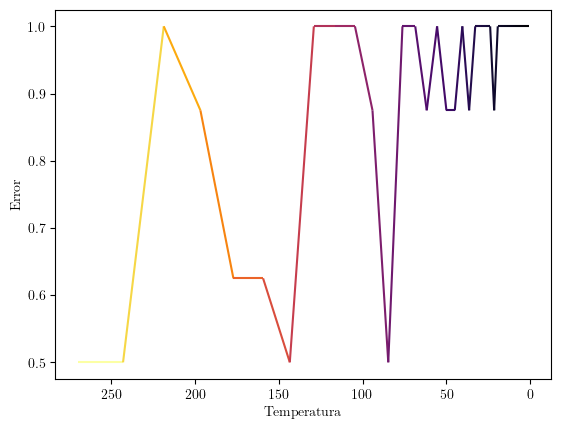

In [293]:
# por el 1 if output > 0.5 else 0 los errores y el costo terminan siendo lo mismo
points = np.array([temperatures, errors]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
cmap = plt.cm.inferno
lc = LineCollection(segments, cmap=cmap)
lc.set_array(np.array(temperatures))
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.invert_xaxis()
plt.xlabel('Temperatura')
plt.ylabel('Error')
save_plot('simulated_annealing-error_xor')
plt.show()

$\underline{\text{TP3 - Ejercicio 1}}$  
Construya una red de Kohonen de $2$ entradas que aprenda una distribución uniforme dentro del círculo unitario. Mostrar el mapa de preservación de topología. Probar con distribuciones uniformes dentro de otras figuras geométricas.

In [ ]:
def generate_unit_circle_points(n_points):
    points = []
    for _ in range(n_points):
        r = np.random.uniform(0, 1)
        theta = np.random.uniform(0, 2 * np.pi)
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        points.append([x, y])
    return np.array(points)

def scatter_figure(points, x_lim, y_lim):
    plt.scatter(points[:,0], points[:,1], color='crimson', s=15)
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='-')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='-')

unit_circle_points = generate_unit_circle_points(1000)
scatter_figure(unit_circle_points, (-1.5, 1.5), (-1.5, 1.5))

In [ ]:
# Step 1: Generate uniform data within the unit circle
def generate_circle_data(n_points):
    angles = np.random.uniform(0, 2 * np.pi, n_points)
    radii = np.sqrt(np.random.uniform(0, 1, n_points))  # Uniform distribution in circle
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return np.vstack((x, y)).T

data = generate_circle_data(100)

# Step 2: Initialize the Kohonen map
n_neurons = 10
neurons = np.random.uniform(-1, 1, (n_neurons, 2))  # Initial positions of neurons

# Parameters
learning_rate = 0.1
sigma = 0.5  # Neighborhood radius
n_iterations = 10000

# Gaussian neighborhood function
def gaussian_neighborhood(distance, sigma):
    return np.exp(-distance**2 / (2 * sigma**2))

# Step 3: Train the Kohonen network
for t in range(n_iterations):
    # Select a random data point
    sample = data[np.random.choice(data.shape[0])]
    
    # Compute distances to all neurons
    distances = np.linalg.norm(neurons - sample, axis=1)
    
    # Find the Best Matching Unit (BMU)
    bmu_idx = np.argmin(distances)
    
    # Update neurons
    for i, neuron in enumerate(neurons):
        dist_to_bmu = np.linalg.norm(neurons[bmu_idx] - neuron)
        influence = gaussian_neighborhood(dist_to_bmu, sigma)
        neurons[i] += learning_rate * influence * (sample - neuron)
    
    # Decrease learning rate and sigma over time
    learning_rate *= 0.995
    sigma *= 0.995

# Step 4: Visualize the results
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.5, label="Data (Uniform Circle)")
plt.plot(neurons[:, 0], neurons[:, 1], '-o', color='red', label="Kohonen Neurons")
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Kohonen Map - Circle Unitario")
plt.legend()
plt.show()